In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
dataset = pd.read_csv("/home/rajeckidoyle/Documents/Classification/BACE_Classification/model_benchmarks/bace/raw/bace.csv")
dataset.head()

,mol,CID,Class,Model,pIC50,MW,AlogP,HBA,HBD,RB,...,PEOE6 (PEOE6),PEOE7 (PEOE7),PEOE8 (PEOE8),PEOE9 (PEOE9),PEOE10 (PEOE10),PEOE11 (PEOE11),PEOE12 (PEOE12),PEOE13 (PEOE13),PEOE14 (PEOE14),canvasUID
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,BACE_1,1,Train,9.154901,431.56979,4.4014,3,2,5,...,53.205711,78.640335,226.85541,107.43491,37.133846,0.000000,7.980170,0.0,0.000000,1
1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...,BACE_2,1,Train,8.853872,657.81073,2.6412,5,4,16,...,73.817162,47.171600,365.67694,174.07675,34.923889,7.980170,24.148668,0.0,24.663788,2
2,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_3,1,Train,8.698970,591.74091,2.5499,4,3,11,...,70.365707,47.941147,192.40652,255.75255,23.654478,0.230159,15.879790,0.0,24.663788,3
3,S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...,BACE_4,1,Train,8.698970,591.67828,3.1680,4,3,12,...,56.657166,37.954151,194.35304,202.76335,36.498634,0.980913,8.188327,0.0,26.385181,4
4,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_5,1,Train,8.698970,629.71283,3.5086,3,3,11,...,78.945702,39.361153,179.71288,220.46130,23.654478,0.230159,15.879790,0.0,26.100143,5


In [20]:
def class_assignment(row):
  if row['pIC50'] < 7.0:
    return 0
  else:
    return 1

In [21]:
dataset['Class'] = dataset.apply(class_assignment, axis=1)

In [22]:
dataset.head()

,mol,CID,Class,Model,pIC50,MW,AlogP,HBA,HBD,RB,...,PEOE6 (PEOE6),PEOE7 (PEOE7),PEOE8 (PEOE8),PEOE9 (PEOE9),PEOE10 (PEOE10),PEOE11 (PEOE11),PEOE12 (PEOE12),PEOE13 (PEOE13),PEOE14 (PEOE14),canvasUID
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,BACE_1,1,Train,9.154901,431.56979,4.4014,3,2,5,...,53.205711,78.640335,226.85541,107.43491,37.133846,0.000000,7.980170,0.0,0.000000,1
1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...,BACE_2,1,Train,8.853872,657.81073,2.6412,5,4,16,...,73.817162,47.171600,365.67694,174.07675,34.923889,7.980170,24.148668,0.0,24.663788,2
2,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_3,1,Train,8.698970,591.74091,2.5499,4,3,11,...,70.365707,47.941147,192.40652,255.75255,23.654478,0.230159,15.879790,0.0,24.663788,3
3,S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...,BACE_4,1,Train,8.698970,591.67828,3.1680,4,3,12,...,56.657166,37.954151,194.35304,202.76335,36.498634,0.980913,8.188327,0.0,26.385181,4
4,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_5,1,Train,8.698970,629.71283,3.5086,3,3,11,...,78.945702,39.361153,179.71288,220.46130,23.654478,0.230159,15.879790,0.0,26.100143,5


In [23]:
dataset.to_csv('/home/rajeckidoyle/Documents/Classification/BACE_Classification/model_benchmarks/bace/raw/bace.csv', index=False)

<BarContainer object of 2 artists>

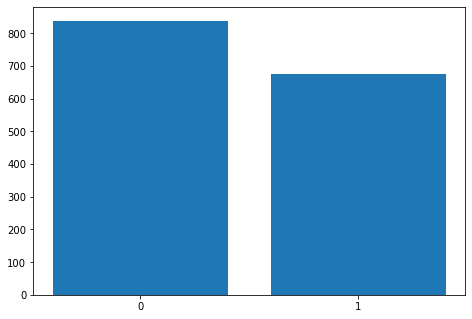

In [24]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
classes = ['0','1']
counts = [len(dataset)-dataset["Class"].sum(),dataset["Class"].sum()]
ax.bar(classes,counts)

In [25]:
classes_by_split = dataset[["Class","Model"]]
classes_by_split = classes_by_split.rename(columns = {"Class":"Count","Model":"Split"})
classes_by_split["Class"] = classes_by_split["Count"]
classes_by_split = classes_by_split.groupby(["Split","Class"]).count()
classes_by_split = classes_by_split.reindex([("Train",0),("Train",1),("Valid",0),("Valid",1),("Test",0),("Test",1)])
counts = classes_by_split["Count"].to_list()

In [26]:
barchartdata = pd.DataFrame({'0': counts[::2],
                         '1': counts[1::2], },
                        index=['Train', 'Valid', 'Test'])

In [27]:
barchartdata.sum(axis=1)

Train     203
Valid      45
Test     1265
dtype: int64

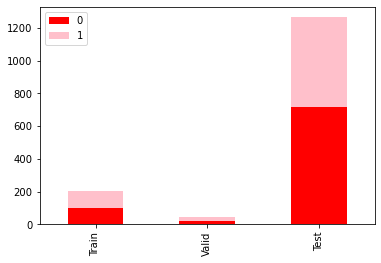

In [28]:
barchartdata.plot(kind='bar', stacked=True, color=['red', 'pink'])
plt.savefig('/home/rajeckidoyle/Documents/Classification/BACE_Classification/exploratory_images/countsbarchart.jpeg', bbox_inches='tight',dpi=100)

In [29]:
class_0 = dataset.loc[dataset['Class'] == 0]
class_1 = dataset.loc[dataset['Class'] == 1]

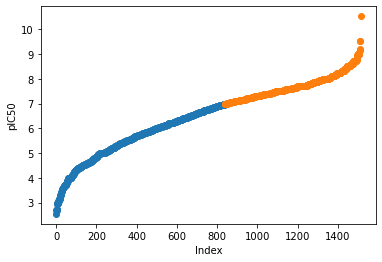

In [30]:
x = [i for i in range(len(class_0))]
y = sorted(np.array(class_0['pIC50']))
plt.scatter(x, y)

x = [i for i in range(len(class_0),len(class_0)+len(class_1))]
y = sorted(np.array(class_1['pIC50']))
plt.xlabel('Index')
plt.ylabel('pIC50')
plt.scatter(x, y)
plt.savefig('/home/rajeckidoyle/Documents/Classification/BACE_Classification/exploratory_images/indexvspIC50.jpeg', bbox_inches='tight', dpi=100)

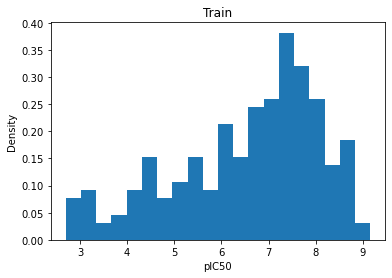

In [49]:
train_dataset = dataset.loc[dataset['Model']=='Train']
valid_dataset = dataset.loc[dataset['Model']=='Valid']
test_dataset = dataset.loc[dataset['Model']=='Test']

plt.hist(train_dataset['pIC50'],bins=20,density=True)
plt.xlabel('pIC50')
plt.ylabel('Density')
plt.title('Train')
plt.savefig('/home/rajeckidoyle/Documents/Classification/BACE_Classification/exploratory_images/trainhist.jpeg', bbox_inches='tight', dpi=100)

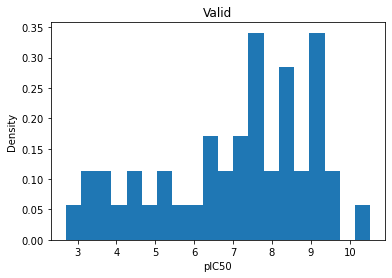

In [50]:
plt.hist(valid_dataset['pIC50'],bins=20,density=True)
plt.xlabel('pIC50')
plt.ylabel('Density')
plt.title('Valid')
plt.savefig('/home/rajeckidoyle/Documents/Classification/BACE_Classification/exploratory_images/validhist.jpeg', bbox_inches='tight', dpi=100)

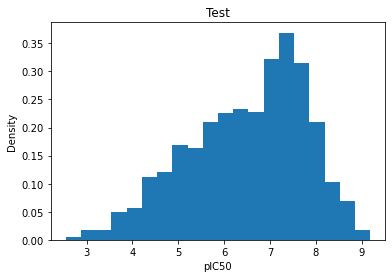

In [51]:
plt.hist(test_dataset['pIC50'],bins=20,density=True)
plt.xlabel('pIC50')
plt.ylabel('Density')
plt.title('Test')
plt.savefig('/home/rajeckidoyle/Documents/Classification/BACE_Classification/exploratory_images/testhist.jpeg', bbox_inches='tight', dpi=100)